In [1]:
import sklearn

# Clustering Dataset
We will use the make_classification() function to create a test binary classification dataset.

The dataset will have 1,000 examples, with two input features and one cluster per class. The clusters are visually obvious in two dimensions so that we can plot the data with a scatter plot and color the points in the plot by the assigned cluster. This will help to see, at least on the test problem, how “well” the clusters were identified.

The clusters in this test problem are based on a multivariate Gaussian, and not all clustering algorithms will be effective at identifying these types of clusters. As such, the results in this tutorial should not be used as the basis for comparing the methods generally.


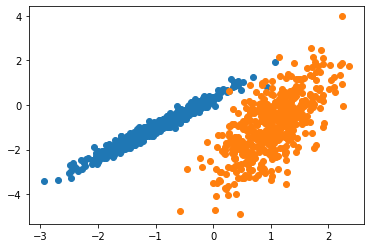

In [2]:
# synthetic classification dataset
from numpy import where
from sklearn.datasets import make_classification
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# create scatter plot for samples from each class
for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = where(y == class_value)
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

# Affinity Propagation
Affinity Propagation involves finding a set of exemplars that best summarize the data.

        ... We devised a method called “affinity propagation,” which takes as input measures of similarity between pairs of data points. Real-valued messages are exchanged between data points until a high-quality set of exemplars and corresponding clusters gradually emerges


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_affinity_propagation.py:146: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(("'random_state' has been introduced in 0.23. "


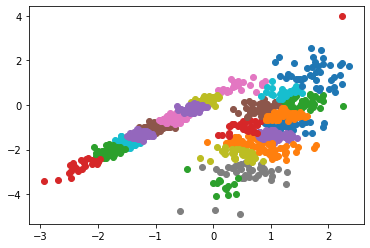

In [3]:
# affinity propagation clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AffinityPropagation
from matplotlib import pyplot
# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = AffinityPropagation(damping=0.9)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

Running the example fits the model on the training dataset and predicts a cluster for each example in the dataset. A scatter plot is then created with points colored by their assigned cluster.

In this case, I could not achieve a good result.

# Agglomerative Clustering
Agglomerative clustering involves merging examples until the desired number of clusters is achieved.

       ...We devised a method called “affinity propagation,” which takes as input measures of similarity between pairs of data points. Real-valued messages are exchanged between data points until a high-quality set of exemplars and corresponding clusters gradually emerges
        
It is a part of a broader class of hierarchical clustering methods
It is implemented via the AgglomerativeClustering class and the main configuration to tune is the “n_clusters” set, an estimate of the number of clusters in the data, e.g. 2.
The complete example is listed below.

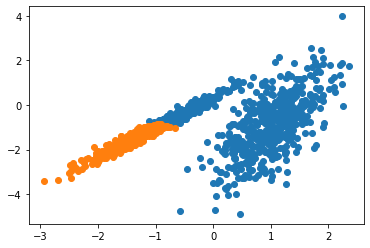

In [4]:
# agglomerative clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot
# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = AgglomerativeClustering(n_clusters=2)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

Running the example fits the model on the training dataset and predicts a cluster for each example in the dataset. A scatter plot is then created with points colored by their assigned cluster.

In this case, a reasonable grouping is found. 

# BIRCH
For big datasets
BIRCH Clustering (BIRCH is short for Balanced Iterative Reducing and Clustering using
Hierarchies) involves constructing a tree structure from which cluster centroids are extracted.

       ... BIRCH incrementally and dynamically clusters incoming multi-dimensional metric data points to try to produce the best quality clustering with the available resources (i. e., available memory and time constraints).

It is implemented via the Birch class and the main configuration to tune is the “threshold” and “n_clusters” hyperparameters, the latter of which provides an estimate of the number of clusters.

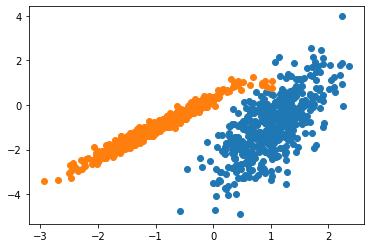

In [5]:
# birch clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import Birch
from matplotlib import pyplot
# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = Birch(threshold=0.01, n_clusters=2)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

Running the example fits the model on the training dataset and predicts a cluster for each example in the dataset. A scatter plot is then created with points colored by their assigned cluster.

In this case, an excellent grouping is found.

# DBSCAN

DBSCAN Clustering (where DBSCAN is short for Density-Based Spatial Clustering of Applications with Noise) involves finding high-density areas in the domain and expanding those areas of the feature space around them as clusters.

      ... we present the new clustering algorithm DBSCAN relying on a density-based notion of clusters which is designed to discover clusters of arbitrary shape. DBSCAN requires only one input parameter and supports the user in determining an appropriate value for it

It is implemented via the DBSCAN class and the main configuration to tune is the “eps” and “min_samples” hyperparameters.

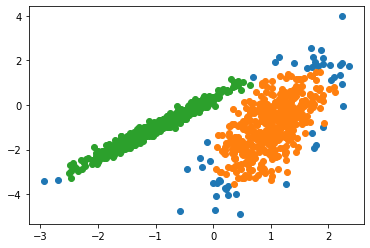

In [6]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from matplotlib import pyplot
# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = DBSCAN(eps=0.30, min_samples=9)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

Running the example fits the model on the training dataset and predicts a cluster for each example in the dataset. A scatter plot is then created with points colored by their assigned cluster.

In this case, a reasonable grouping is found, although more tuning is required.

# K-Means
K-Means Clustering may be the most widely known clustering algorithm and involves assigning examples to clusters in an effort to minimize the variance within each cluster.

        ..The main purpose is to describe a process for partitioning an N-dimensional population into k sets on the basis of a sample. The process, which is called ‘k-means,’ appears to give partitions which are reasonably efficient in the sense of within-class variance.
        
It is implemented via the KMeans class and the main configuration to tune is the “n_clusters” hyperparameter set to the estimated number of clusters in the data.

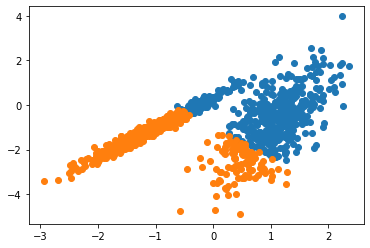

In [7]:
# k-means clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from matplotlib import pyplot
# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = KMeans(n_clusters=2)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

Running the example fits the model on the training dataset and predicts a cluster for each example in the dataset. A scatter plot is then created with points colored by their assigned cluster.

In this case, a reasonable grouping is found, although the unequal equal variance in each dimension makes the method less suited to this dataset.

# Mini-Batch K-Means
Mini-Batch K-Means is a modified version of k-means that makes updates to the cluster centroids using mini-batches of samples rather than the entire dataset, which can make it faster for large datasets, and perhaps more robust to statistical noise.

    ...we propose the use of mini-batch optimization for k-means clustering. This reduces computation cost by orders of magnitude compared to the classic batch algorithm while yielding significantly better solutions than online stochastic gradient descent.
    
It is implemented via the MiniBatchKMeans class and the main configuration to tune is the “n_clusters” hyperparameter set to the estimated number of clusters in the data.
    

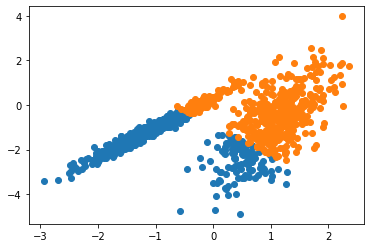

In [8]:
# mini-batch k-means clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import MiniBatchKMeans
from matplotlib import pyplot
# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = MiniBatchKMeans(n_clusters=2)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

Running the example fits the model on the training dataset and predicts a cluster for each example in the dataset. A scatter plot is then created with points colored by their assigned cluster.

In this case, a result equivalent to the standard k-means algorithm is found.

# Mean Shift
Mean shift clustering involves finding and adapting centroids based on the density of examples in the feature space.

        ...We prove for discrete data the convergence of a recursive mean shift procedure to the nearest stationary point of the underlying density function and thus its utility in detecting the modes of the density.

It is implemented via the MeanShift class and the main configuration to tune is the “bandwidth” hyperparameter.

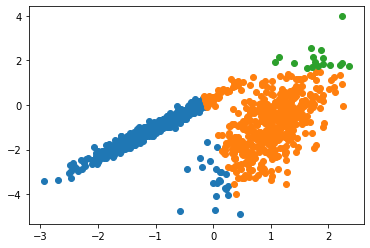

In [9]:
# mean shift clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import MeanShift
from matplotlib import pyplot
# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = MeanShift()
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

Running the example fits the model on the training dataset and predicts a cluster for each example in the dataset. A scatter plot is then created with points colored by their assigned cluster.

In this case, a reasonable set of clusters are found in the data.

# OPTICS

OPTICS clustering (where OPTICS is short for Ordering Points To Identify the Clustering Structure) is a modified version of DBSCAN described above.

        ...We introduce a new algorithm for the purpose of cluster analysis which does not produce a clustering of a data set explicitly; but instead creates an augmented ordering of the database representing its density-based clustering structure. This cluster-ordering contains information which is equivalent to the density-based clusterings corresponding to a broad range of parameter settings
        
It is implemented via the OPTICS class and the main configuration to tune is the “eps” and “min_samples” hyperparameters.


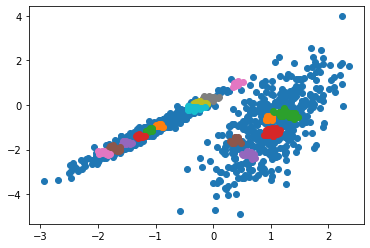

In [10]:
# optics clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import OPTICS
from matplotlib import pyplot
# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = OPTICS(eps=0.8, min_samples=10)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

Running the example fits the model on the training dataset and predicts a cluster for each example in the dataset. A scatter plot is then created with points colored by their assigned cluster.

In this case, I could not achieve a reasonable result on this dataset. 

# Spectral Clustering
Spectral Clustering is a general class of clustering methods, drawn from linear algebra.

        ...A promising alternative that has recently emerged in a number of fields is to use spectral methods for clustering. Here, one uses the top eigenvectors of a matrix derived from the distance between points.

It is implemented via the SpectralClustering class and the main Spectral Clustering is a general class of clustering methods, drawn from linear algebra. to tune is the “n_clusters” hyperparameter used to specify the estimated number of clusters in the data.

The complete example is listed below.

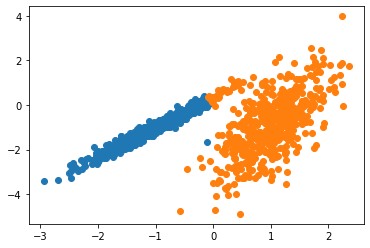

In [11]:
# spectral clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import SpectralClustering
from matplotlib import pyplot
# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = SpectralClustering(n_clusters=2)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

Running the example fits the model on the training dataset and predicts a cluster for each example in the dataset. A scatter plot is then created with points colored by their assigned cluster. 

# Gaussian Mixture Model# Gaussian Mixture Model
A Gaussian mixture model summarizes a multivariate probability density function with a mixture of Gaussian probability distributions as its name suggests.

It is implemented via the GaussianMixture class and the main configuration to tune is the “n_clusters” hyperparameter used to specify the estimated number of clusters in the data.

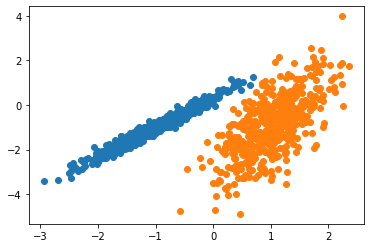

In [12]:
# gaussian mixture clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot
# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = GaussianMixture(n_components=2)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

Running the example fits the model on the training dataset and predicts a cluster for each example in the dataset. A scatter plot is then created with points colored by their assigned cluster.

In this case, we can see that the clusters were identified perfectly. This is not surprising given that the dataset was generated as a mixture of Gaussians